## Data Collection and Preparation

#### importing necessary libraries

In [396]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# import seaborn as sns

#### Loading the Data

In [397]:
url1 = "https://raw.githubusercontent.com/ek-chris/Practice_datasets/refs/heads/main/home_loan_train.csv"
# url2 = "https://raw.githubusercontent.com/ek-chris/Practice_datasets/refs/heads/main/home_loan_test.csv"

In [398]:
df = pd.read_csv(url1)
# data2 = pd.read_csv(url2)

## Preliminary Data Analysis

In [399]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [400]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [401]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [402]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [403]:
print(len(df))
# print(len(data2))
# print(len(dataset))



614


In [404]:
df.shape

(614, 13)

In [405]:
missing_total = df.isna().sum()
missing_total

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [406]:
missing_total.sum()

np.int64(149)

In [407]:
len(df)

614

## Data Cleaning

In [408]:
df[df["Married"].isna()]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
104,LP001357,Male,NaN,NaN,Graduate,No,3816,754.0,160.0,360.0,1.0,Urban,Y
228,LP001760,Male,NaN,NaN,Graduate,No,4758,0.0,158.0,480.0,1.0,Semiurban,Y
435,LP002393,Female,NaN,NaN,Graduate,No,10047,0.0,NaN,240.0,1.0,Semiurban,Y


In [409]:
df.dropna(subset=["Married"], inplace=True)
df.dropna(subset=["Loan_Amount_Term"], inplace=True)
df.dropna(subset=["Gender"], inplace=True)
df.dropna(subset=["Dependents"], inplace=True)


In [410]:
df.isna().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed        31
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           20
Loan_Amount_Term      0
Credit_History       49
Property_Area         0
Loan_Status           0
dtype: int64

In [411]:
df["LoanAmount"].fillna(df["LoanAmount"].mean(), inplace=True)

df["Self_Employed"].fillna(df["Self_Employed"].mode()[0], inplace=True)

df["Credit_History"].fillna(df["Credit_History"].median(), inplace=True)

df['Dependents'] = df['Dependents'].replace("3+", 3).astype(float)


C:\Users\oyeneye ayomide\AppData\Local\Temp\ipykernel_13484\2466889040.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["LoanAmount"].fillna(df["LoanAmount"].mean(), inplace=True)
C:\Users\oyeneye ayomide\AppData\Local\Temp\ipykernel_13484\2466889040.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values 

In [412]:
df.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

## Descriptive Data Analysis

In [413]:
df.head(20)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,146.001808,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2.0,Graduate,Yes,5417,4196.0,267.000000,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0.0,Not Graduate,No,2333,1516.0,95.000000,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3.0,Graduate,No,3036,2504.0,158.000000,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2.0,Graduate,No,4006,1526.0,168.000000,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1.0,Graduate,No,12841,10968.0,349.000000,360.0,1.0,Semiurban,N


In [414]:
df.shape

(573, 13)

In [415]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 573 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            573 non-null    object 
 1   Gender             573 non-null    object 
 2   Married            573 non-null    object 
 3   Dependents         573 non-null    float64
 4   Education          573 non-null    object 
 5   Self_Employed      573 non-null    object 
 6   ApplicantIncome    573 non-null    int64  
 7   CoapplicantIncome  573 non-null    float64
 8   LoanAmount         573 non-null    float64
 9   Loan_Amount_Term   573 non-null    float64
 10  Credit_History     573 non-null    float64
 11  Property_Area      573 non-null    object 
 12  Loan_Status        573 non-null    object 
dtypes: float64(5), int64(1), object(7)
memory usage: 62.7+ KB


In [416]:
df.describe()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,573.000000,573.000000,573.000000,573.000000,573.000000,573.000000
mean,0.766143,5328.514834,1641.359372,146.001808,341.675393,0.869110
std,1.009278,5909.329219,3001.139055,82.569519,65.186012,0.337575
min,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000
25%,0.000000,2876.000000,0.000000,100.000000,360.000000,1.000000
50%,0.000000,3812.000000,1210.000000,129.000000,360.000000,1.000000
75%,2.000000,5815.000000,2302.000000,165.000000,360.000000,1.000000
max,3.000000,81000.000000,41667.000000,650.000000,480.000000,1.000000


In [417]:
df.nunique()

Loan_ID              573
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      469
CoapplicantIncome    274
LoanAmount           200
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

## Exploratory Data Analysis


In [418]:
average_income = df["ApplicantIncome"].mean()

high_income = df[df["ApplicantIncome"] > average_income]
lesser_income = df[df["ApplicantIncome"] < average_income]


def get_income_rating():
    for _, item in df.iterrows():
        if item["ApplicantIncome"] > average_income:
            return ("High")
        else:
            return ("Low")


df["income_rating"] = get_income_rating()

In [419]:
num_features = df.select_dtypes(include=["number"])
num_features.head()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,0.0,5849,0.0,146.001808,360.0,1.0
1,1.0,4583,1508.0,128.000000,360.0,1.0
2,0.0,3000,0.0,66.000000,360.0,1.0
3,0.0,2583,2358.0,120.000000,360.0,1.0
4,0.0,6000,0.0,141.000000,360.0,1.0


In [420]:
cat_features = df.drop(columns=num_features)
cat_features = cat_features.drop(columns=["Loan_ID"])
cat_features.head()

,Gender,Married,Education,Self_Employed,Property_Area,Loan_Status,income_rating
0,Male,No,Graduate,No,Urban,Y,High
1,Male,Yes,Graduate,No,Rural,N,High
2,Male,Yes,Graduate,Yes,Urban,Y,High
3,Male,Yes,Not Graduate,No,Urban,Y,High
4,Male,No,Graduate,No,Urban,Y,High


## Correlation Analysis

### Univariate analysis

In [434]:
def num_univariate_analysis(df, feature):
    skewness = df[feature].skew()
    kurtosis = df[feature].kurt()

    print("--"*40)
    print(f"\n Analysis for {feature}")
    print("=="*40)
    


    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    sns.histplot(df[feature], kde=True, color="blueviolet")
    plt.title(f"\nHistplot analysis for {feature}\n")
    plt.xlabel(f"\n{feature}\n")
    plt.ylabel(f"\nFrequency\n")


    plt.subplot(1, 2, 2)
    sns.boxplot(df[feature], color="blueviolet")
    plt.title(f"\n Boxplot for {feature}\n")
    plt.xlabel(f"\n{feature}\n")
    plt.ylabel(f"\nFrequency\n")

    plt.tight_layout()
    plt.show()


    print(f"{feature} feature skewness: {skewness:.3f}")
    print(f"{feature} feature kurtosis: {kurtosis:.3f}")

    if skewness > 1:
        print(f"{feature} values set are highly skewed")
    elif skewness > 0.5:
        print(f"{feature} values set are Moderately skewed")
    else :
        print(f"{feature} values set are Slightly skewed\n")

--------------------------------------------------------------------------------

 Analysis for Dependents


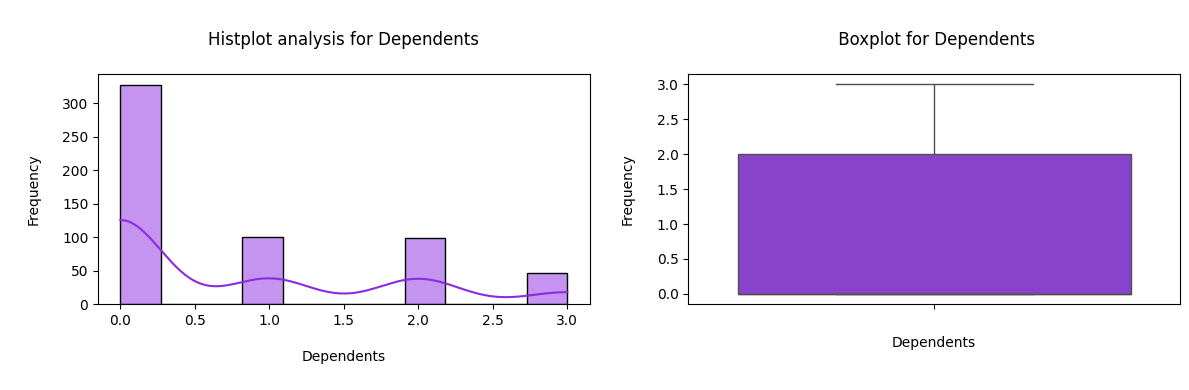

Dependents feature skewness: 0.963
Dependents feature kurtosis: -0.440
Dependents values set are Moderately skewed
--------------------------------------------------------------------------------

 Analysis for ApplicantIncome


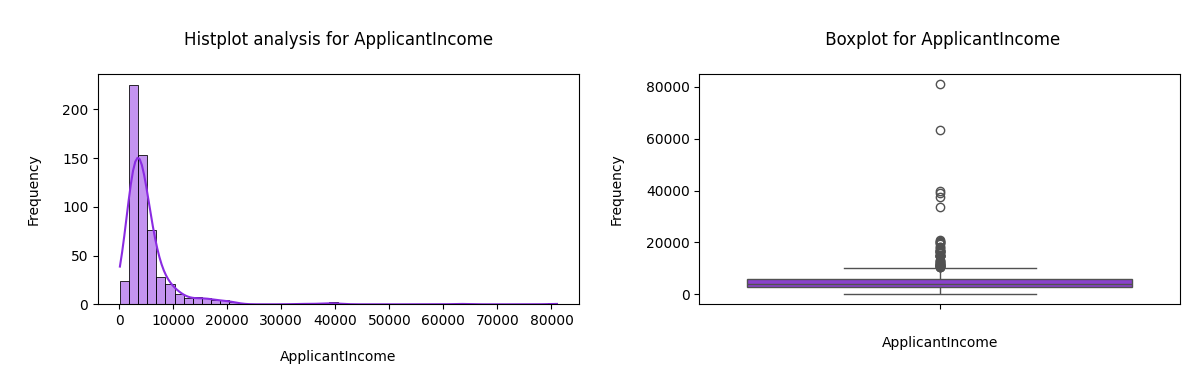

ApplicantIncome feature skewness: 6.868
ApplicantIncome feature kurtosis: 68.292
ApplicantIncome values set are highly skewed
--------------------------------------------------------------------------------

 Analysis for CoapplicantIncome


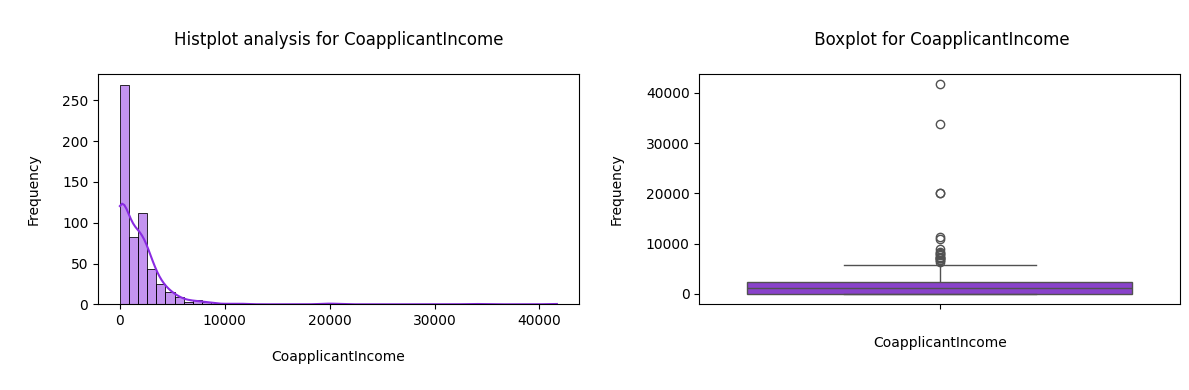

CoapplicantIncome feature skewness: 7.421
CoapplicantIncome feature kurtosis: 82.046
CoapplicantIncome values set are highly skewed
--------------------------------------------------------------------------------

 Analysis for LoanAmount


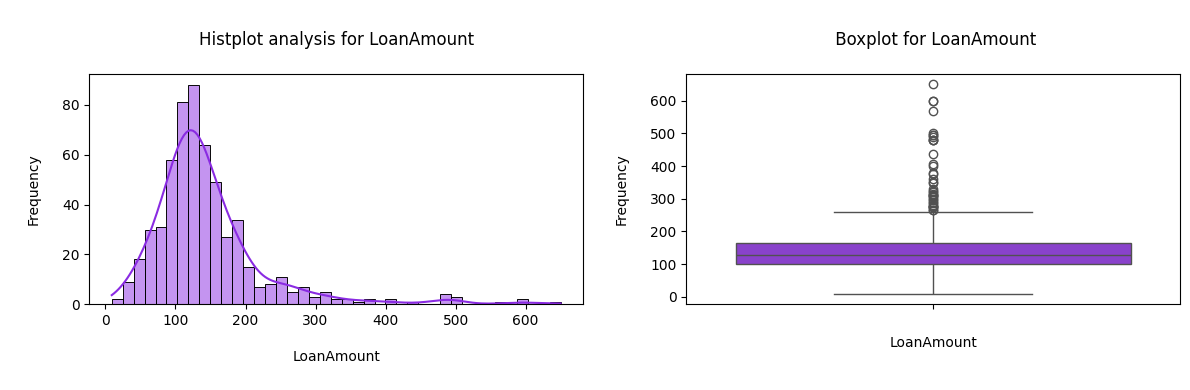

LoanAmount feature skewness: 2.531
LoanAmount feature kurtosis: 9.355
LoanAmount values set are highly skewed
--------------------------------------------------------------------------------

 Analysis for Loan_Amount_Term


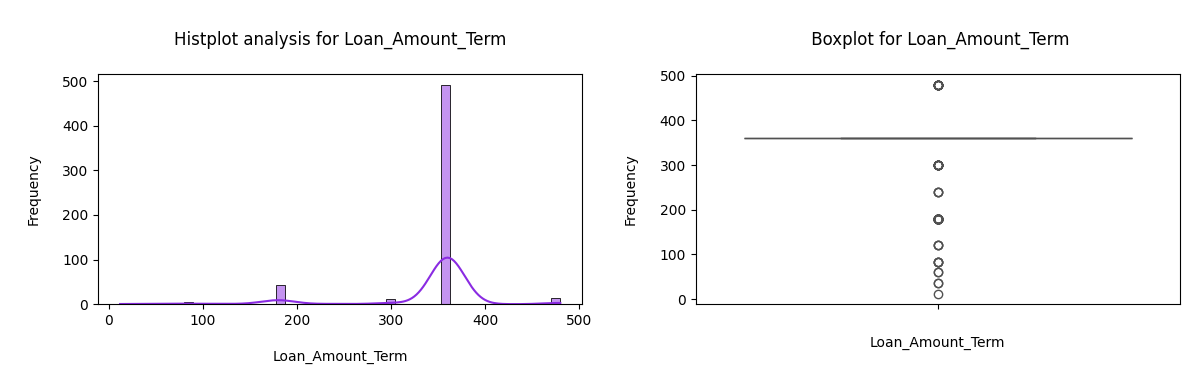

Loan_Amount_Term feature skewness: -2.425
Loan_Amount_Term feature kurtosis: 6.828
Loan_Amount_Term values set are Slightly skewed

--------------------------------------------------------------------------------

 Analysis for Credit_History


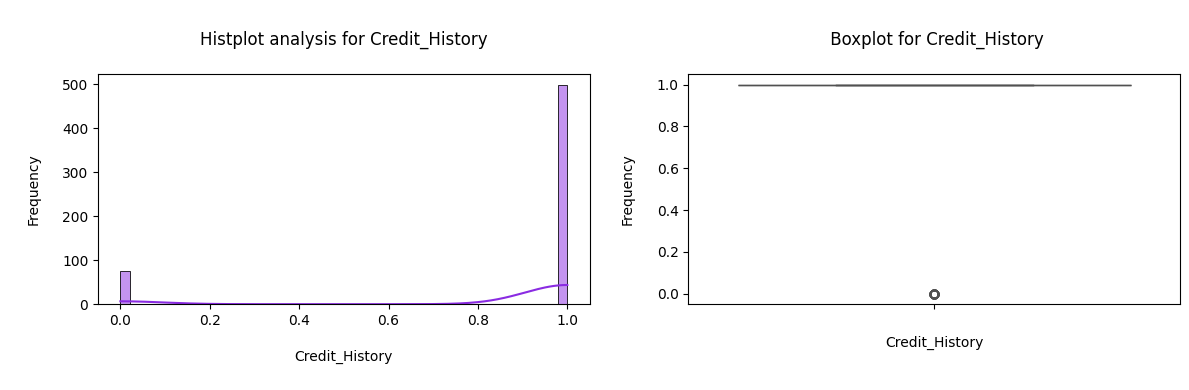

Credit_History feature skewness: -2.194
Credit_History feature kurtosis: 2.826
Credit_History values set are Slightly skewed



In [435]:
for feature in num_features:
    num_univariate_analysis(num_features, feature)

In [436]:
def cat_univariate_analysis(df, feature):
    

    print("--"*40)
    print(f"\n Analysis for {feature}")
    print("=="*40)
    
    

    plt.figure(figsize=(8, 4))
    sns.countplot(x="Self_Employed", data=df, color="blueviolet")
    plt.title(f"\nCountplot for {feature}\n")
    plt.xlabel(f"\n{feature}\n")
    plt.ylabel(f"\nFrequency\n")

    plt.tight_layout()
    plt.show()






--------------------------------------------------------------------------------

 Analysis for Gender


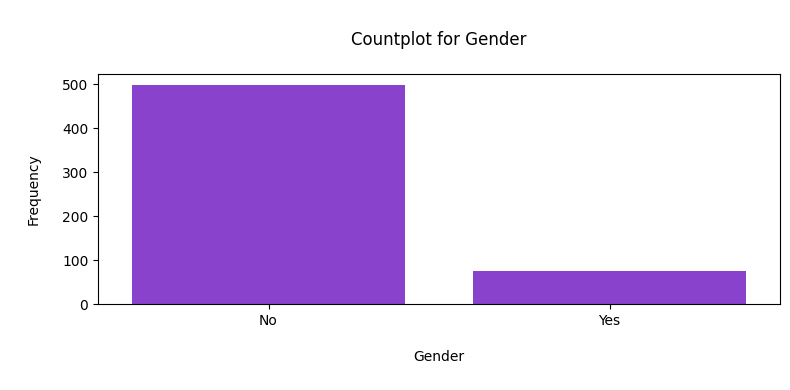

--------------------------------------------------------------------------------

 Analysis for Married


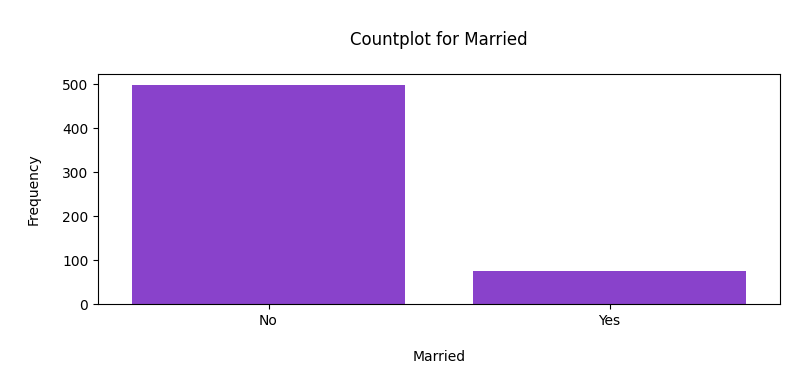

--------------------------------------------------------------------------------

 Analysis for Education


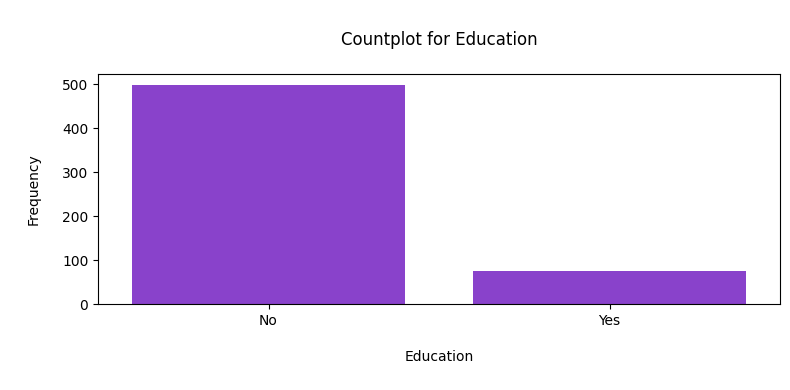

--------------------------------------------------------------------------------

 Analysis for Self_Employed


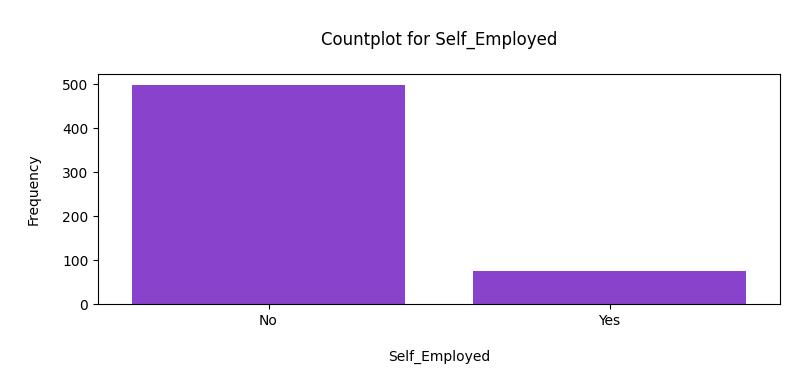

--------------------------------------------------------------------------------

 Analysis for Property_Area


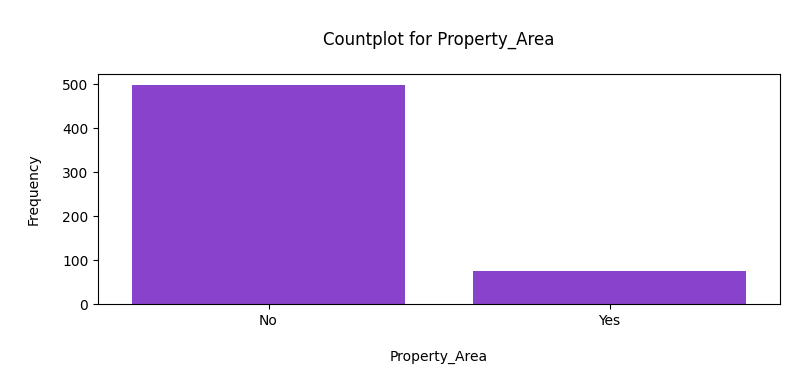

--------------------------------------------------------------------------------

 Analysis for Loan_Status


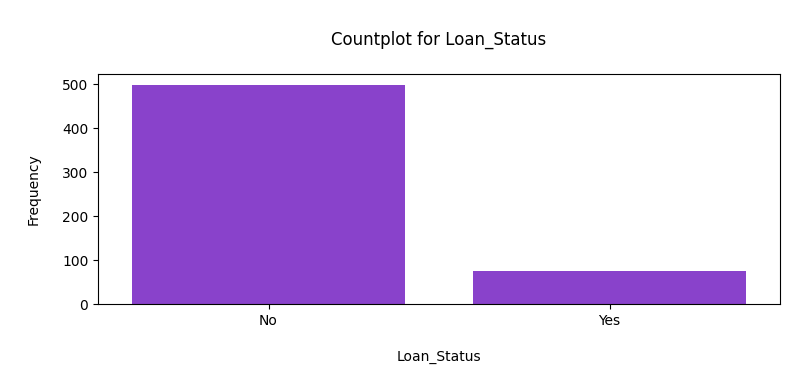

--------------------------------------------------------------------------------

 Analysis for income_rating


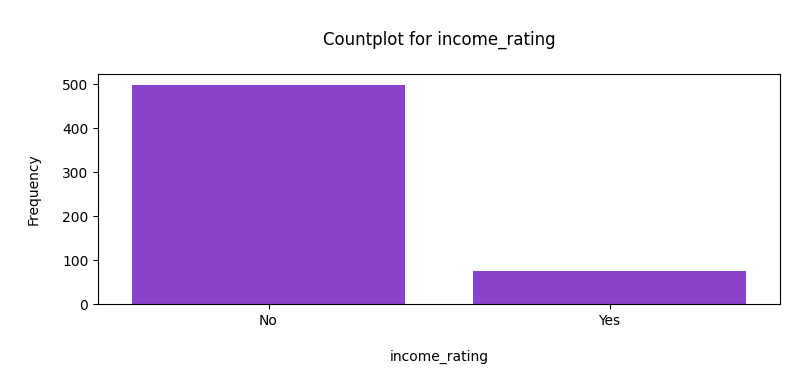

In [437]:
for feature in cat_features:
    cat_univariate_analysis(cat_features, feature)

### Bivariate Analysis

In [431]:
df.head(2)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,income_rating
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,146.001808,360.0,1.0,Urban,Y,High
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,High


In [438]:
def bivariate_analysis_pipeline_categorical(df, feature, hue):
    plt.figure(figsize=(8,4))
    sns.countplot(x=feature, hue=hue, data=df, color="blueviolet")
    plt.title(label=f"\nCount plot showing relationship between {feature} and Loan Status\n ")
    plt.xlabel(f"\n{feature}")
    plt.ylabel("Frequency")
    plt.show()

C:\Users\oyeneye ayomide\AppData\Local\Temp\ipykernel_13484\235663319.py:3: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:blueviolet'` for the same effect.

  sns.countplot(x=feature, hue=hue, data=df, color="blueviolet")


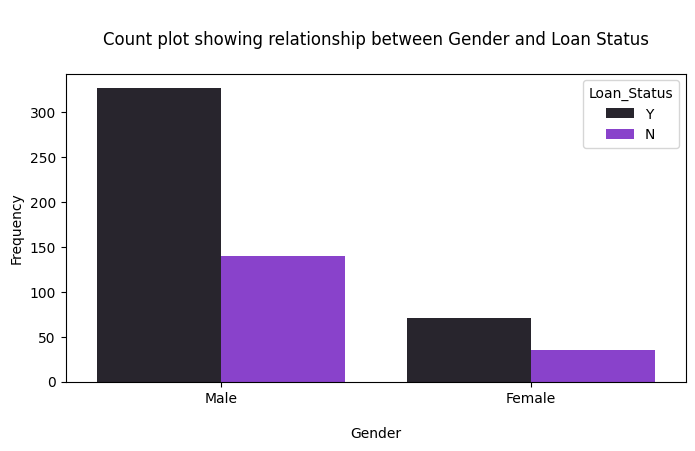

C:\Users\oyeneye ayomide\AppData\Local\Temp\ipykernel_13484\235663319.py:3: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:blueviolet'` for the same effect.

  sns.countplot(x=feature, hue=hue, data=df, color="blueviolet")


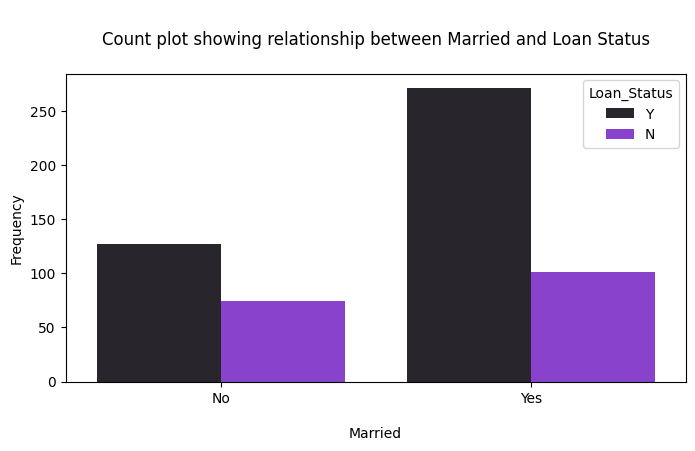

C:\Users\oyeneye ayomide\AppData\Local\Temp\ipykernel_13484\235663319.py:3: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:blueviolet'` for the same effect.

  sns.countplot(x=feature, hue=hue, data=df, color="blueviolet")


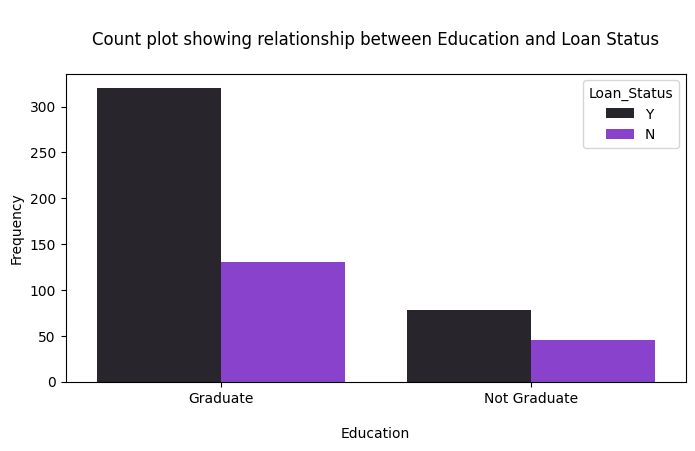

C:\Users\oyeneye ayomide\AppData\Local\Temp\ipykernel_13484\235663319.py:3: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:blueviolet'` for the same effect.

  sns.countplot(x=feature, hue=hue, data=df, color="blueviolet")


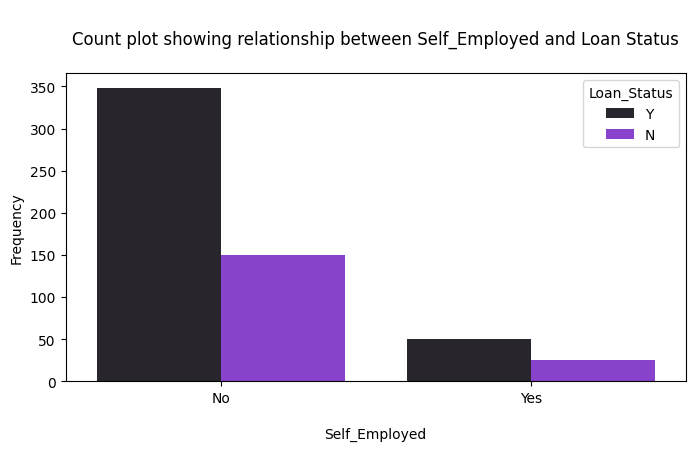

C:\Users\oyeneye ayomide\AppData\Local\Temp\ipykernel_13484\235663319.py:3: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:blueviolet'` for the same effect.

  sns.countplot(x=feature, hue=hue, data=df, color="blueviolet")


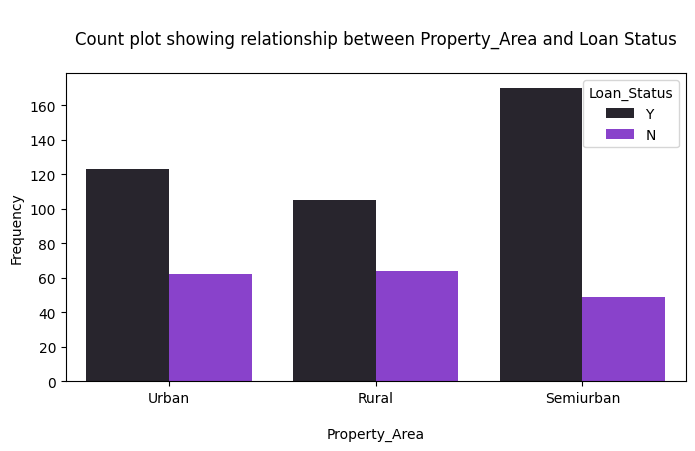

C:\Users\oyeneye ayomide\AppData\Local\Temp\ipykernel_13484\235663319.py:3: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:blueviolet'` for the same effect.

  sns.countplot(x=feature, hue=hue, data=df, color="blueviolet")


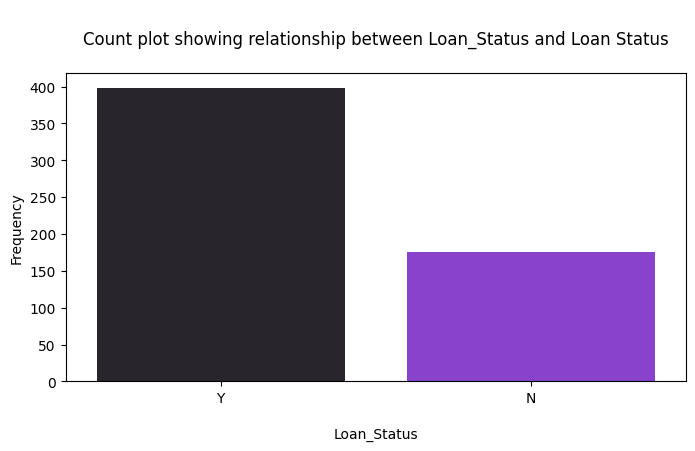

C:\Users\oyeneye ayomide\AppData\Local\Temp\ipykernel_13484\235663319.py:3: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:blueviolet'` for the same effect.

  sns.countplot(x=feature, hue=hue, data=df, color="blueviolet")


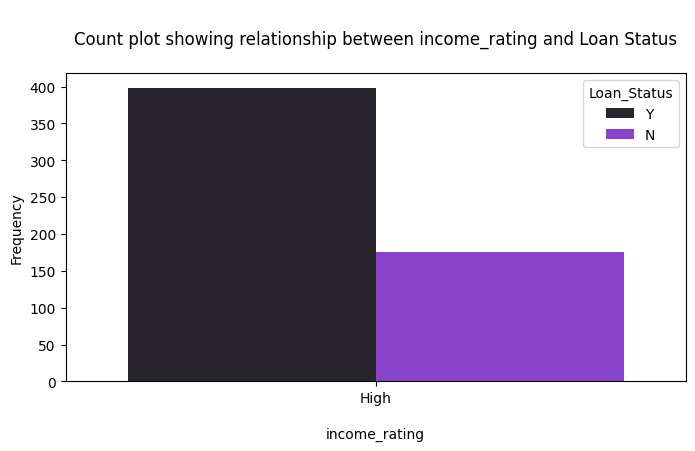

In [439]:




for feature in cat_features:
    hue = df["Loan_Status"]
    bivariate_analysis_pipeline_categorical(cat_features, feature, hue)



